<a href="https://colab.research.google.com/github/glycodynamics/BME370/blob/main/Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Hypothesis Testing**
This notebook demonstrates various hypothesis testing techniques including t-tests, chi-squared tests, and regression analysis. Dataset links are provided for ease of access.

---



In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#from scipy.stats import ttest_1samp
#from scipy.stats import ttest_ind

In [62]:
data_1 = pd.read_csv("https://raw.githubusercontent.com/glycodynamics/BME370/refs/heads/main/data/diabetes.csv")
data_2 = pd.read_csv("https://raw.githubusercontent.com/glycodynamics/BME370/refs/heads/main/data/diabetes_2.csv")
data_3 = pd.read_csv("https://raw.githubusercontent.com/glycodynamics/BME370/refs/heads/main/data/blood_pressure.csv")
data_3

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


#
**1. One-Sample t-test**

H₀: μ = 100       (Mean glucose is 100)

Hₐ: μ ≠ 100       (Mean glucose is not 100)

In [63]:
# Perform one-sample t-test on the entire Glucose column
t_statistic, p_value = stats.ttest_1samp(data['Glucose'], popmean=100)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

T-statistic: 18.11069
P-value: 0.00000


t = 18.111 → This is a very large t-statistic, which suggests your sample mean is far away from 100.

p = 0.000 → This is shorthand for p < 0.0005, meaning the result is highly statistically significant.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


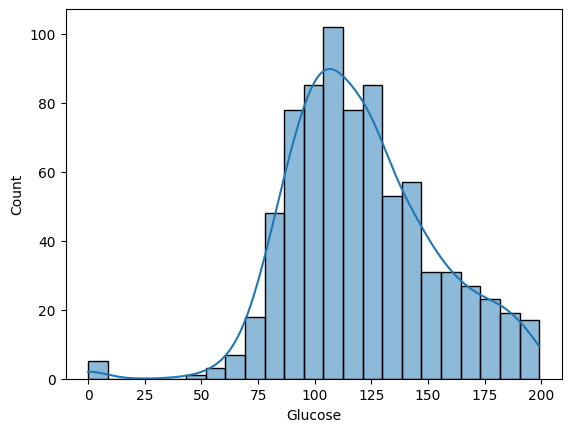

In [64]:
sns.histplot(data_1['Glucose'], kde=True)


data_1.describe()



**Independent Two-Sample t-test**

This is a two-sample t-test, so the hypotheses are:

**Null Hypothesis ($H_0$)**: The mean glucose level of diabetic individuals is equal to that of non-diabetic individuals.

$\mu_{\text{diabetic}} \ = \mu_{\text   {non-diabetic}}$

**Alternative Hypothesis ($H_A$)**: The mean glucose level of diabetic individuals is not equal to that of non-diabetic individuals.

$\mu_{\text{diabetic}} \ne \mu_{\text   {non-diabetic}}$

This is a two-tailed!

In [65]:
diabetic = data_1[data_1['Outcome'] == 1]
non_diabetic = data_1[data_1['Outcome'] == 0]
non_diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [66]:
t_statistic, p_value = stats.ttest_ind(diabetic['Glucose'], non_diabetic['Glucose'])
print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

T-statistic: 14.60006
P-value: 0.00000


**Statistical Significance**:
The p-value is extremely small (way below any common threshold like 0.05, 0.01, or even 0.001). So, we reject the null hypothesis.

**Conclusion:**
There is strong statistical evidence that the mean glucose level of diabetic individuals is different from that of non-diabetic individuals.

*Glucose levels are significantly higher in people with diabetes compared to those without*

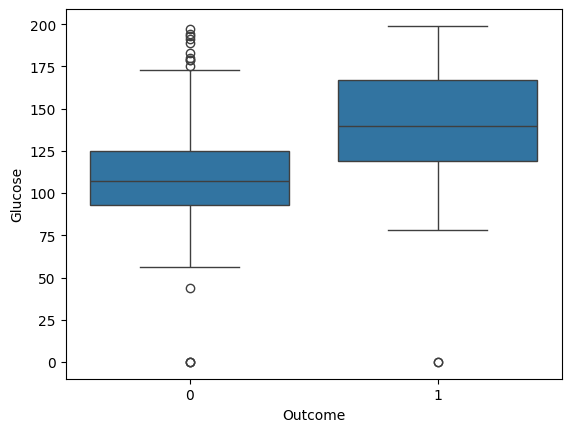

In [67]:
# Plot mean glucose levels with error bars
sns.boxplot(x='Outcome', y='Glucose', data=data_1)
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()


**Paired Two-Sample t-test**

This is paired two-sample t-test, so the hypotheses are:

**Null Hypothesis ($H_0$)**: The mean blood pressure of individuals before the medicine is equal to that of after the medicine.

$\mu_{\text{bp_before}} \ = \mu_{\text   {bp_after}}$

**Alternative Hypothesis ($H_A$)**: The mean blood pressure of individuals before the medicine is not equal to that of after the medicine.

$\mu_{\text{bp_before}} \ne \mu_{\text   {bp_after}}$

In [68]:
#To conduct the paired sample t-test, one needs to use the stats.ttest_rel() method.
t_statistic, p_value = stats.ttest_rel(data_3['bp_before'], data_3['bp_after'])
print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

T-statistic: 3.33719
P-value: 0.00113


The findings are statistically significant! One can reject the null hypothesis in support of the alternative.

Medication has a significant affect on the blood pressure. The blood pressure before the intervention was higher compared to the blood pressure post intervention. There was a statistically significant decrease in blood pressure (t(119)=3.34, p= 0.00113)



,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


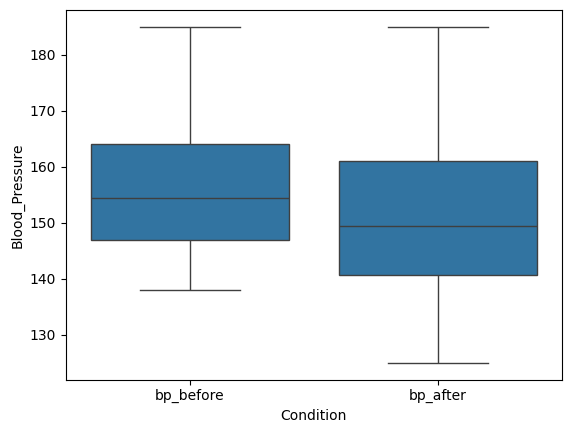

In [70]:
# Melt the data into long format
bp_data = data_3[['bp_before', 'bp_after']].melt(var_name='Condition', value_name='Blood_Pressure')

# Plot boxplot
bp_data

# box plot
sns.boxplot(x='Condition', y='Blood_Pressure', data=bp_data)
data_3[['bp_before','bp_after']].describe()
